<a href="https://colab.research.google.com/github/shivaniverma7455/Image_Recognition_ML/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivaniverma7455","key":"8682d23342dc04880def641188677675"}'}

In [8]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [10]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test) =tf.keras.datasets.mnist.load_data()
print(f"train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [11]:
x_train= x_train /255.0
x_test= x_test/255.0
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28,1)
print(f"Train reshape: {x_train.shape}")

Train reshape: (60000, 28, 28, 1)


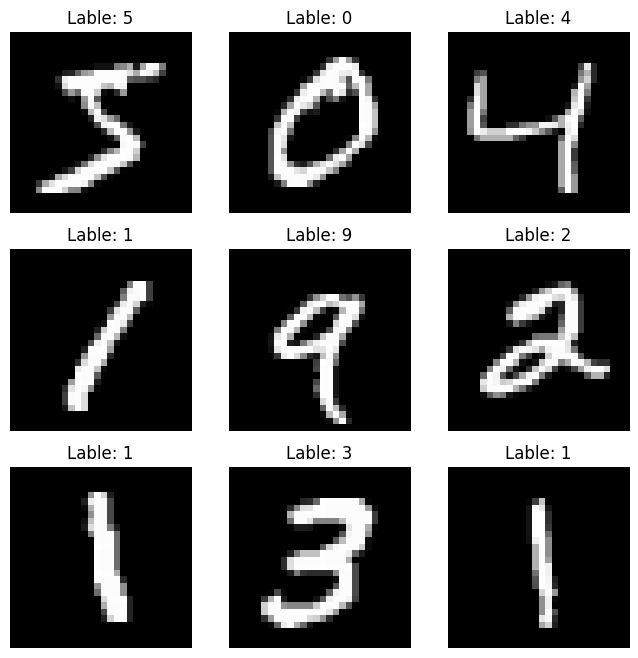

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Lable: {y_train[i]}")
  plt.axis('off')
plt.show()

In [13]:
(x_train_c10, y_train_c10), (x_test_c10, y_train_c10)= tf.keras.datasets.cifar10.load_data()
x_train_c10= x_train_c10/255.0
x_test_c10= x_test_c10/255.0
print(f"CIFAR-10 train shape:{x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape:(50000, 32, 32, 3)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8984 - loss: 0.3326 - val_accuracy: 0.9846 - val_loss: 0.0529
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.9857 - loss: 0.0460 - val_accuracy: 0.9854 - val_loss: 0.0485
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9878 - val_loss: 0.0426
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9937 - loss: 0.0195 - val_accuracy: 0.9887 - val_loss: 0.0416
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9901 - val_loss: 0.0361


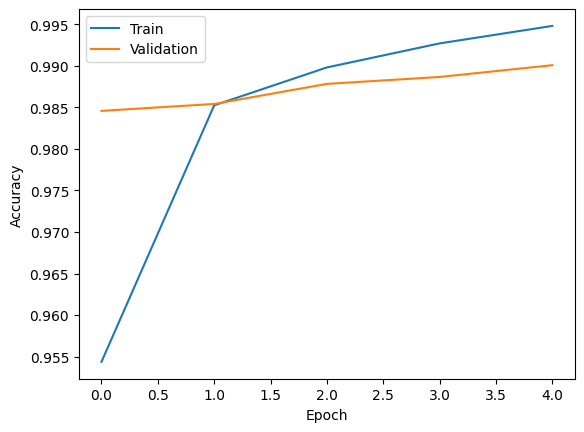

In [16]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_acc:.4f}")

y_pred = model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9881 - loss: 0.0369
Test Accuracy: 0.9905
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [18]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

# Load and preprocess CIFAR-10 data
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    datagen.flow(x_train_c10, y_train_c10, batch_size=32),
    epochs=10,
    validation_data=(x_test_c10, y_test_c10)
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 79ms/step - accuracy: 0.3447 - loss: 1.7745 - val_accuracy: 0.5523 - val_loss: 1.2378
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5354 - loss: 1.2956 - val_accuracy: 0.6055 - val_loss: 1.0994
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.5969 - loss: 1.1482 - val_accuracy: 0.4662 - val_loss: 1.6299
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 78ms/step - accuracy: 0.6250 - loss: 1.0768 - val_accuracy: 0.6587 - val_loss: 0.9837
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6465 - loss: 1.0187 - val_accuracy: 0.6613 - val_loss: 0.9856
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 78ms/step - accuracy: 0.6613 - loss: 0.9763 - val_accuracy: 0.6338 - val_loss: 1.0962
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.6750 - loss: 0.9360 - val_accuracy: 0.7110 - val_loss: 0.8457
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.6856 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.88      0.86      0.87      1000
           2       0.63      0.60      0.61      1000
           3       0.59      0.47      0.52      1000
           4       0.80      0.59      0.68      1000
           5       0.72      0.55      0.62      1000
           6       0.71      0.84      0.77      1000
           7       0.72      0.76      0.74      1000
           8       0.73      0.85      0.78      1000
           9       0.62      0.92      0.74      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



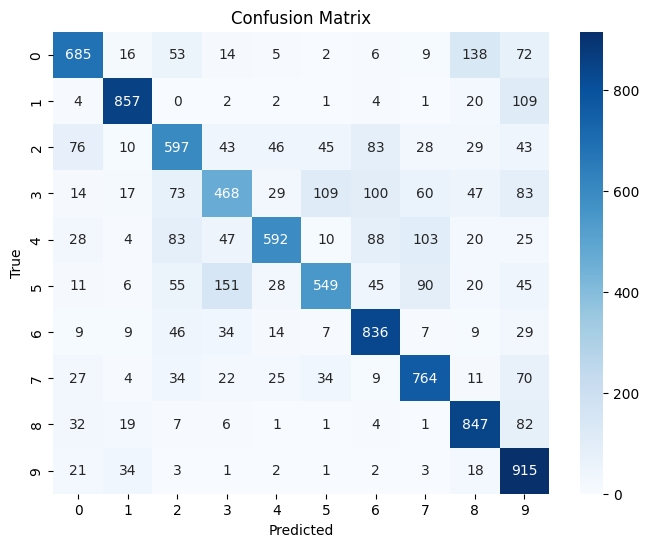

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_c10 = model.predict(x_test_c10).argmax(axis=1)

# Correct variable name: y_text_c10 ➝ y_test_c10
y_true_c10 = y_test_c10.flatten()


cm = confusion_matrix(y_true_c10, y_pred_c10)
print(classification_report(y_true_c10, y_pred_c10))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()


In [24]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:00<00:00, 382MB/s] 
100% 218M/218M [00:00<00:00, 392MB/s]


In [25]:
import zipfile

with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # use 'validation' for validation set
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [27]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load MobileNetV2 as base model
base_model = MobileNetV2(
    weights='imagenet',          # lowercase 'imagenet'
    include_top=False,           # Python uses capitalized False, not 'false'
    input_shape=(224, 224, 3)    # correct argument name: input_shape
)

# Freeze base model layers
base_model.trainable = False

# Build model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']        # correct spelling: metrics, not matrics
)

# Train model
model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator  # correct spelling: validation_data
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.7795 - loss: 0.5544 - val_accuracy: 0.7985 - val_loss: 0.5109
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.7965 - loss: 0.4991 - val_accuracy: 0.7985 - val_loss: 0.5119
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.7989 - loss: 0.4868 - val_accuracy: 0.7985 - val_loss: 0.5156
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.8038 - loss: 0.4685 - val_accuracy: 0.7985 - val_loss: 0.5182
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.8020 - loss: 0.4588 - val_accuracy: 0.7975 - val_loss: 0.5326


In [28]:
import tensorflow as tf
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(
    train_generator,
    epochs=3,
    validation_data=val_generator
)



Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1705s 7s/step - accuracy: 0.7922 - loss: 0.4905 - val_accuracy: 0.7950 - val_loss: 0.5368
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1638s 7s/step - accuracy: 0.8060 - loss: 0.4446 - val_accuracy: 0.7925 - val_loss: 0.5385
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1642s 7s/step - accuracy: 0.8088 - loss: 0.4201 - val_accuracy: 0.7920 - val_loss: 0.5422


In [29]:

model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step


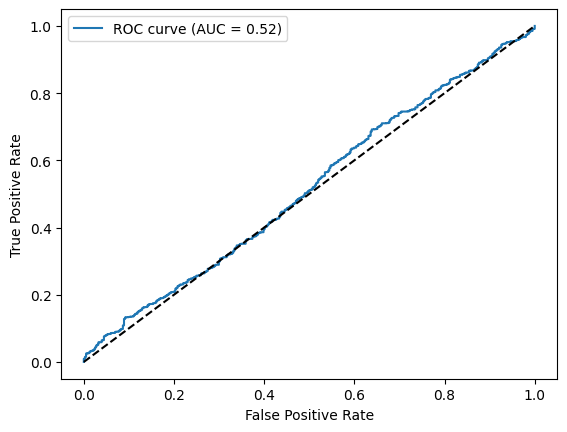

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [38]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Path to the uploaded image
img_path = 'download.jpg'

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict using the loaded model
prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")



Saving download.jpg to download (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Predicted class: Dog


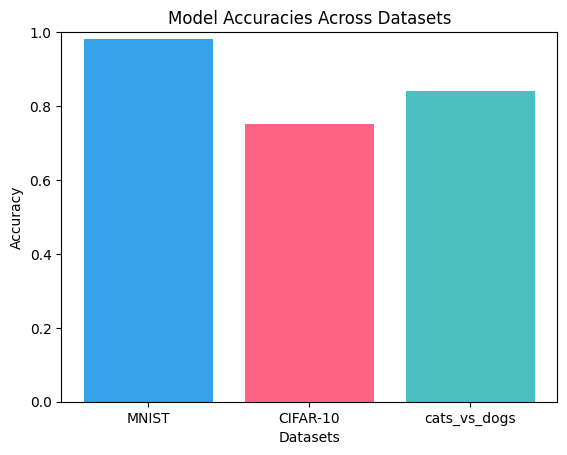

In [37]:
import matplotlib.pyplot as plt

datasets = ['MNIST', 'CIFAR-10', 'cats_vs_dogs']
accuracies = [0.98, 0.75, 0.84]

plt.bar(datasets, accuracies, color=['#36A2EB', '#ff6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
